In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
df = pd.read_csv('operations.csv')
df.head()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,8,11,13,31,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


Here we've verified that we've successfully brought a Aerial Bombings from WWII (Allies) in from Kaggle (https://www.kaggle.com/usaf/world-war-ii/version/1) and checked the head.

(array([  3.16000000e+02,   0.00000000e+00,   3.13610000e+04,
          0.00000000e+00,   0.00000000e+00,   6.33000000e+02,
          0.00000000e+00,   1.90000000e+01,   0.00000000e+00,
          9.41650000e+04]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

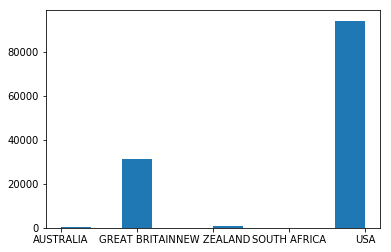

In [10]:
country = df['Country']
plt.hist(country.dropna())

This histogram examines the amount of bombing raids conducted by different allied countries, but omits those raids in which the country was not recorded (NaN in the dataframe). As we can see, Australia, New Zealand, and South Africa ran a few raids, but were not major contributors to the Allied air effort.

Great Britain contributed a large amount, but the United States of America ran far more bombing raids across all theaters by a very large margin.

As we do.

In [32]:
df['Mission Datetime'] = pd.to_datetime(df['Mission Date'])
df.head()
# bombings_by_date = df.groupby('Mission Date')

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID,Mission Datetime
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,1943-08-15
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0,1943-08-15
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,1943-08-15
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN,1943-08-15
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0,1943-08-15


I want to group this by mission date and then do a line chart describing mission frequency per day, but I don't know why Pandas' groupby method is not working.

(array([ 598.,  494.,  248.,  205.,  212.,  231.,  239.,  793.,  158.,  205.]),
 array([   0. ,   13.1,   26.2,   39.3,   52.4,   65.5,   78.6,   91.7,
         104.8,  117.9,  131. ]),
 <a list of 10 Patch objects>)

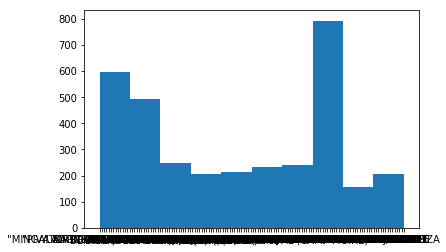

In [43]:
plt.hist(df['Takeoff Base'].dropna())

Wow, that's an awful lot of bases. If I could see the x-axis labels (there's no way to adjust this without an IMAX screen), then I'd know where those spikes are.

Let's hope the Germans don't have that IMAX screen.